# Regressão linear


## O que é:


## Exemplo:

## Uso prático da regressão linear

### Descrição das variáveis:


* Airline: Nome do compainha aérea. É uma variável categórica com 6 tipos diferentes de companhias.

* Flight : Informação sobre o código de voo do avião. É uma variável categórica.

* Source City: Cidade a qual o voo decola. É uma variável categórica com 6 cidades diferentes.

* Departure Time: É uma variável derivada, obtida pelo agrupamento dos períodos de tempo. É uma variável categoricas com 6 períodos de horários 
diferentes.

* Stops: Números de paradas entre a cidade de origem e destino. É uma variável categórica a qual pode ser atribuida zero, um , ou duas ou mais paradas.

* Arrival Time: Horário de chegada, obtido pelo agrupamento de intervalos de tempo. É uma variável categórica que possui 6 tipos distintos que mantém 
informações sobre o horário de chegada do voo.

* Destination City: Cidade de destino , lugar onde o voo pousará. É uma variável categórica que pode assumir uma das 6 cidades avaliadas.

* Class: contém informações sobre a classe do assento. É uma variável categórica que pode assumir um dos dois valores distintos: Business ou Economy. 

* Duration: tempo total de duração do voo entre as cidades, em horas. É uma variável contínua. (tipo: float64)

* Days Left: Dias restantes,calculada subtraindo o data da viagem pela data da reserva. É uma variável contínua.(tipo: int64) 

* Price: Preço da passagem. É a variável contínua a ser prevista pelo método de mínimos quadrados. (tipo: int64)

### Importando biblioteca a serem utilizadas:

In [139]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
# warnings.simplefilter("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression

### Análise e limpeza dos dados:

In [140]:
data = pd.read_csv("Clean_Dataset.csv")

In [141]:
data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


Deletando coluna desnecessária do dataframe

In [142]:
data = data.drop(["Unnamed: 0"],axis=1)

Informações do dataframe

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


Descrição das medidas de resumo das variáveis contínuas

In [144]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


Número de nulos das váriaveis

In [145]:
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Números de NA das variáveis

In [146]:
data.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Números de duplicatas dos dados

In [147]:
data.duplicated().sum()

0

In [148]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [149]:
data.tail()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


Convertendo coluna 'duration' de float para int.

In [150]:
data["duration"] = data["duration"].astype(int)

Excluindo coluna "flight" que será descessária na previsão, uma vez que cada voo tem uma informação específica.


In [151]:
data["flight"]

0         SG-8709
1         SG-8157
2          I5-764
3          UK-995
4          UK-963
           ...   
300148     UK-822
300149     UK-826
300150     UK-832
300151     UK-828
300152     UK-822
Name: flight, Length: 300153, dtype: object

In [152]:
data["flight"].unique()

array(['SG-8709', 'SG-8157', 'I5-764', ..., '6E-7127', '6E-7259',
       'AI-433'], dtype=object)

In [153]:
data = data.drop(["flight"],axis=1)

In [154]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300153 non-null  object
 1   source_city       300153 non-null  object
 2   departure_time    300153 non-null  object
 3   stops             300153 non-null  object
 4   arrival_time      300153 non-null  object
 5   destination_city  300153 non-null  object
 6   class             300153 non-null  object
 7   duration          300153 non-null  int32 
 8   days_left         300153 non-null  int64 
 9   price             300153 non-null  int64 
dtypes: int32(1), int64(2), object(7)
memory usage: 21.8+ MB


### Convertendo e separando as variáveis categóricas

A base de dados utilizadas é formada majoritariamente por variáveis categóricas. Tendo isso em vista, para ser possível a análise dos mínimos quadrados e previsão da  variável preço, devemos mudar a forma como essas variáveis são armazenadas, uma vez que os algoritmos usados só funcionam com valores númericos. 

Não podemos apenas transformar as categorias em valores numéricos, pois é como atribuir valores arbitrários às categorias, e o modelo pode entender que há certa ordem entre as categorias e uma categoria ser o dobro da outra por exemplo, o que não faz sentido verdadeiro e pode atrapalhar o modelo.

Pensando nisso, realizaremos a transformação de tais variáveis para dummys, utilizando método get_dummies, que pode resultar em dois casos:

* Se a variável só assume dois tipos de valores diferentes na coluna: O método converte em True or False (0 ou 1), para os valores diferentes.

* Já se a variável pode assumir mais de dois valores distintos na coluna: o método cria uma coluna para cada categoria e atribui True para o caso que o dado apresenta essa caracteíristica ou False caso contrário (0 ou 1).

In [155]:
data_dummies = pd.get_dummies(data, columns=["airline","source_city","departure_time","stops","arrival_time","destination_city","class"],drop_first=True)

In [156]:
data_dummies.head()

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,2,1,5953,False,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,True
1,2,1,5953,False,False,False,True,False,False,True,...,False,False,True,False,False,False,False,False,True,True
2,2,1,5956,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,True
3,2,1,5955,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,True,True
4,2,1,5955,False,False,False,False,True,False,True,...,False,False,True,False,False,False,False,False,True,True


Convertendo o dataframe de booleano para int (False = 0, True = 1)

In [157]:
data_dummies  = data_dummies.astype(int)

In [158]:
data_dummies.head()

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,2,1,5953,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,1
1,2,1,5953,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,1
2,2,1,5956,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2,1,5955,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
4,2,1,5955,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,1


In [159]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   duration                      300153 non-null  int32
 1   days_left                     300153 non-null  int32
 2   price                         300153 non-null  int32
 3   airline_Air_India             300153 non-null  int32
 4   airline_GO_FIRST              300153 non-null  int32
 5   airline_Indigo                300153 non-null  int32
 6   airline_SpiceJet              300153 non-null  int32
 7   airline_Vistara               300153 non-null  int32
 8   source_city_Chennai           300153 non-null  int32
 9   source_city_Delhi             300153 non-null  int32
 10  source_city_Hyderabad         300153 non-null  int32
 11  source_city_Kolkata           300153 non-null  int32
 12  source_city_Mumbai            300153 non-null  int32
 13  departure_time

### Criando matriz de correlação

Heatmap que mostra os coeficientes de correlação entre todas as variáveis analisadas.

<Axes: >

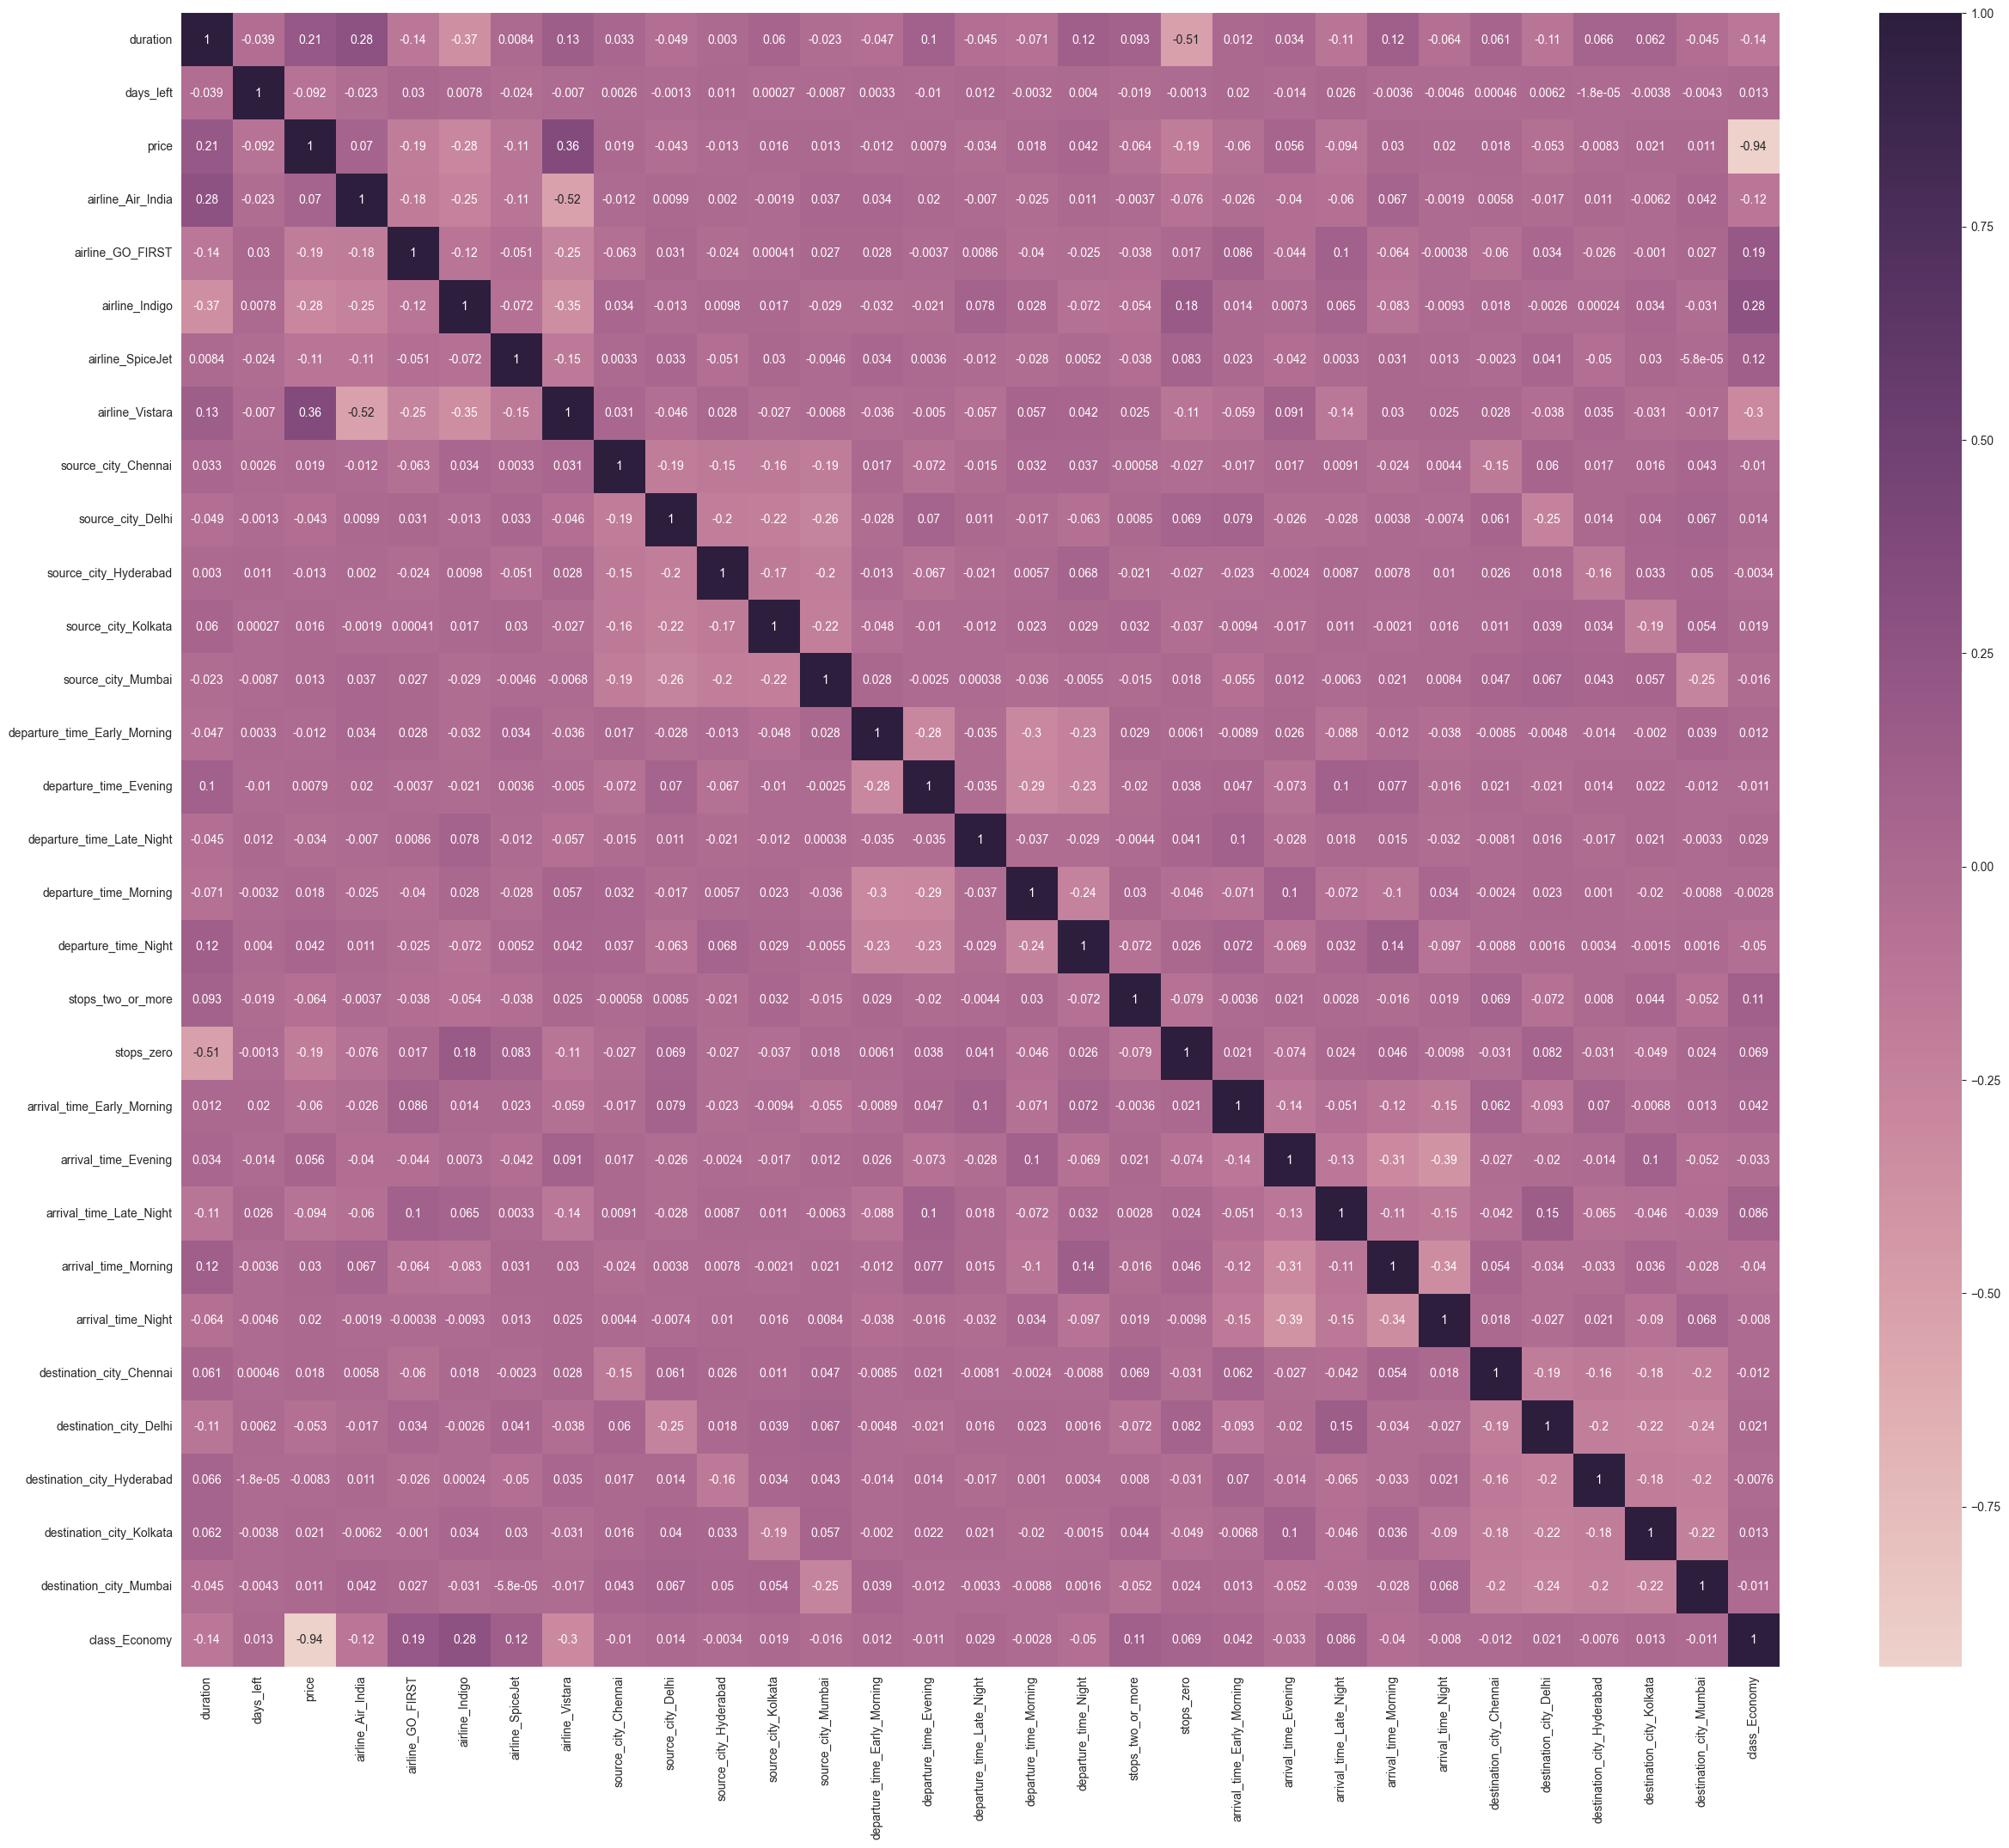

In [160]:
plt.figure(figsize=(30,25)) 
sns.heatmap(data_dummies.corr(),cmap=sns.cubehelix_palette(as_cmap=True), annot=True)

Gráficos de correlação entre as variáveis númericas

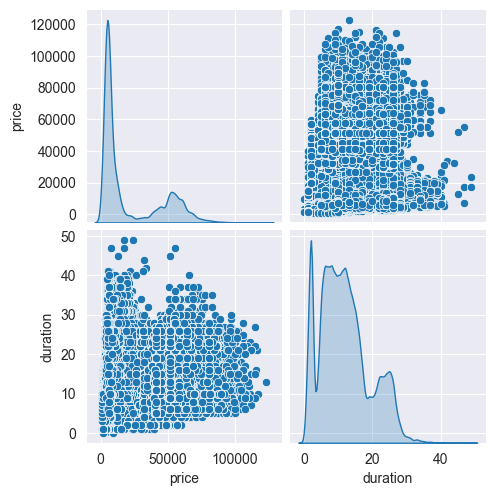

In [161]:
data_num = data_dummies[["price", "duration"]]

sns.pairplot(data_num, diag_kind="kde")
plt.show()

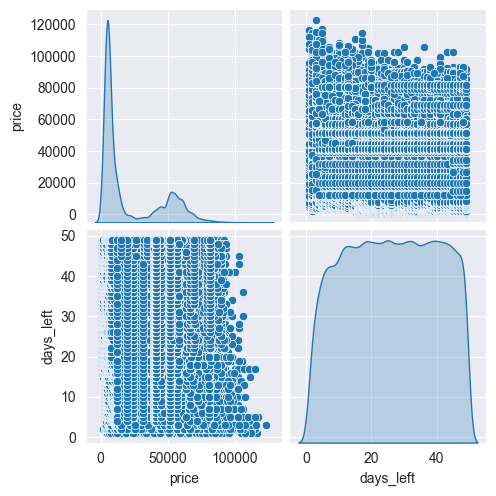

In [162]:
data_num = data_dummies[["price", "days_left"]]

sns.pairplot(data_num, diag_kind="kde")
plt.show()

### Análise variáveis categóricas

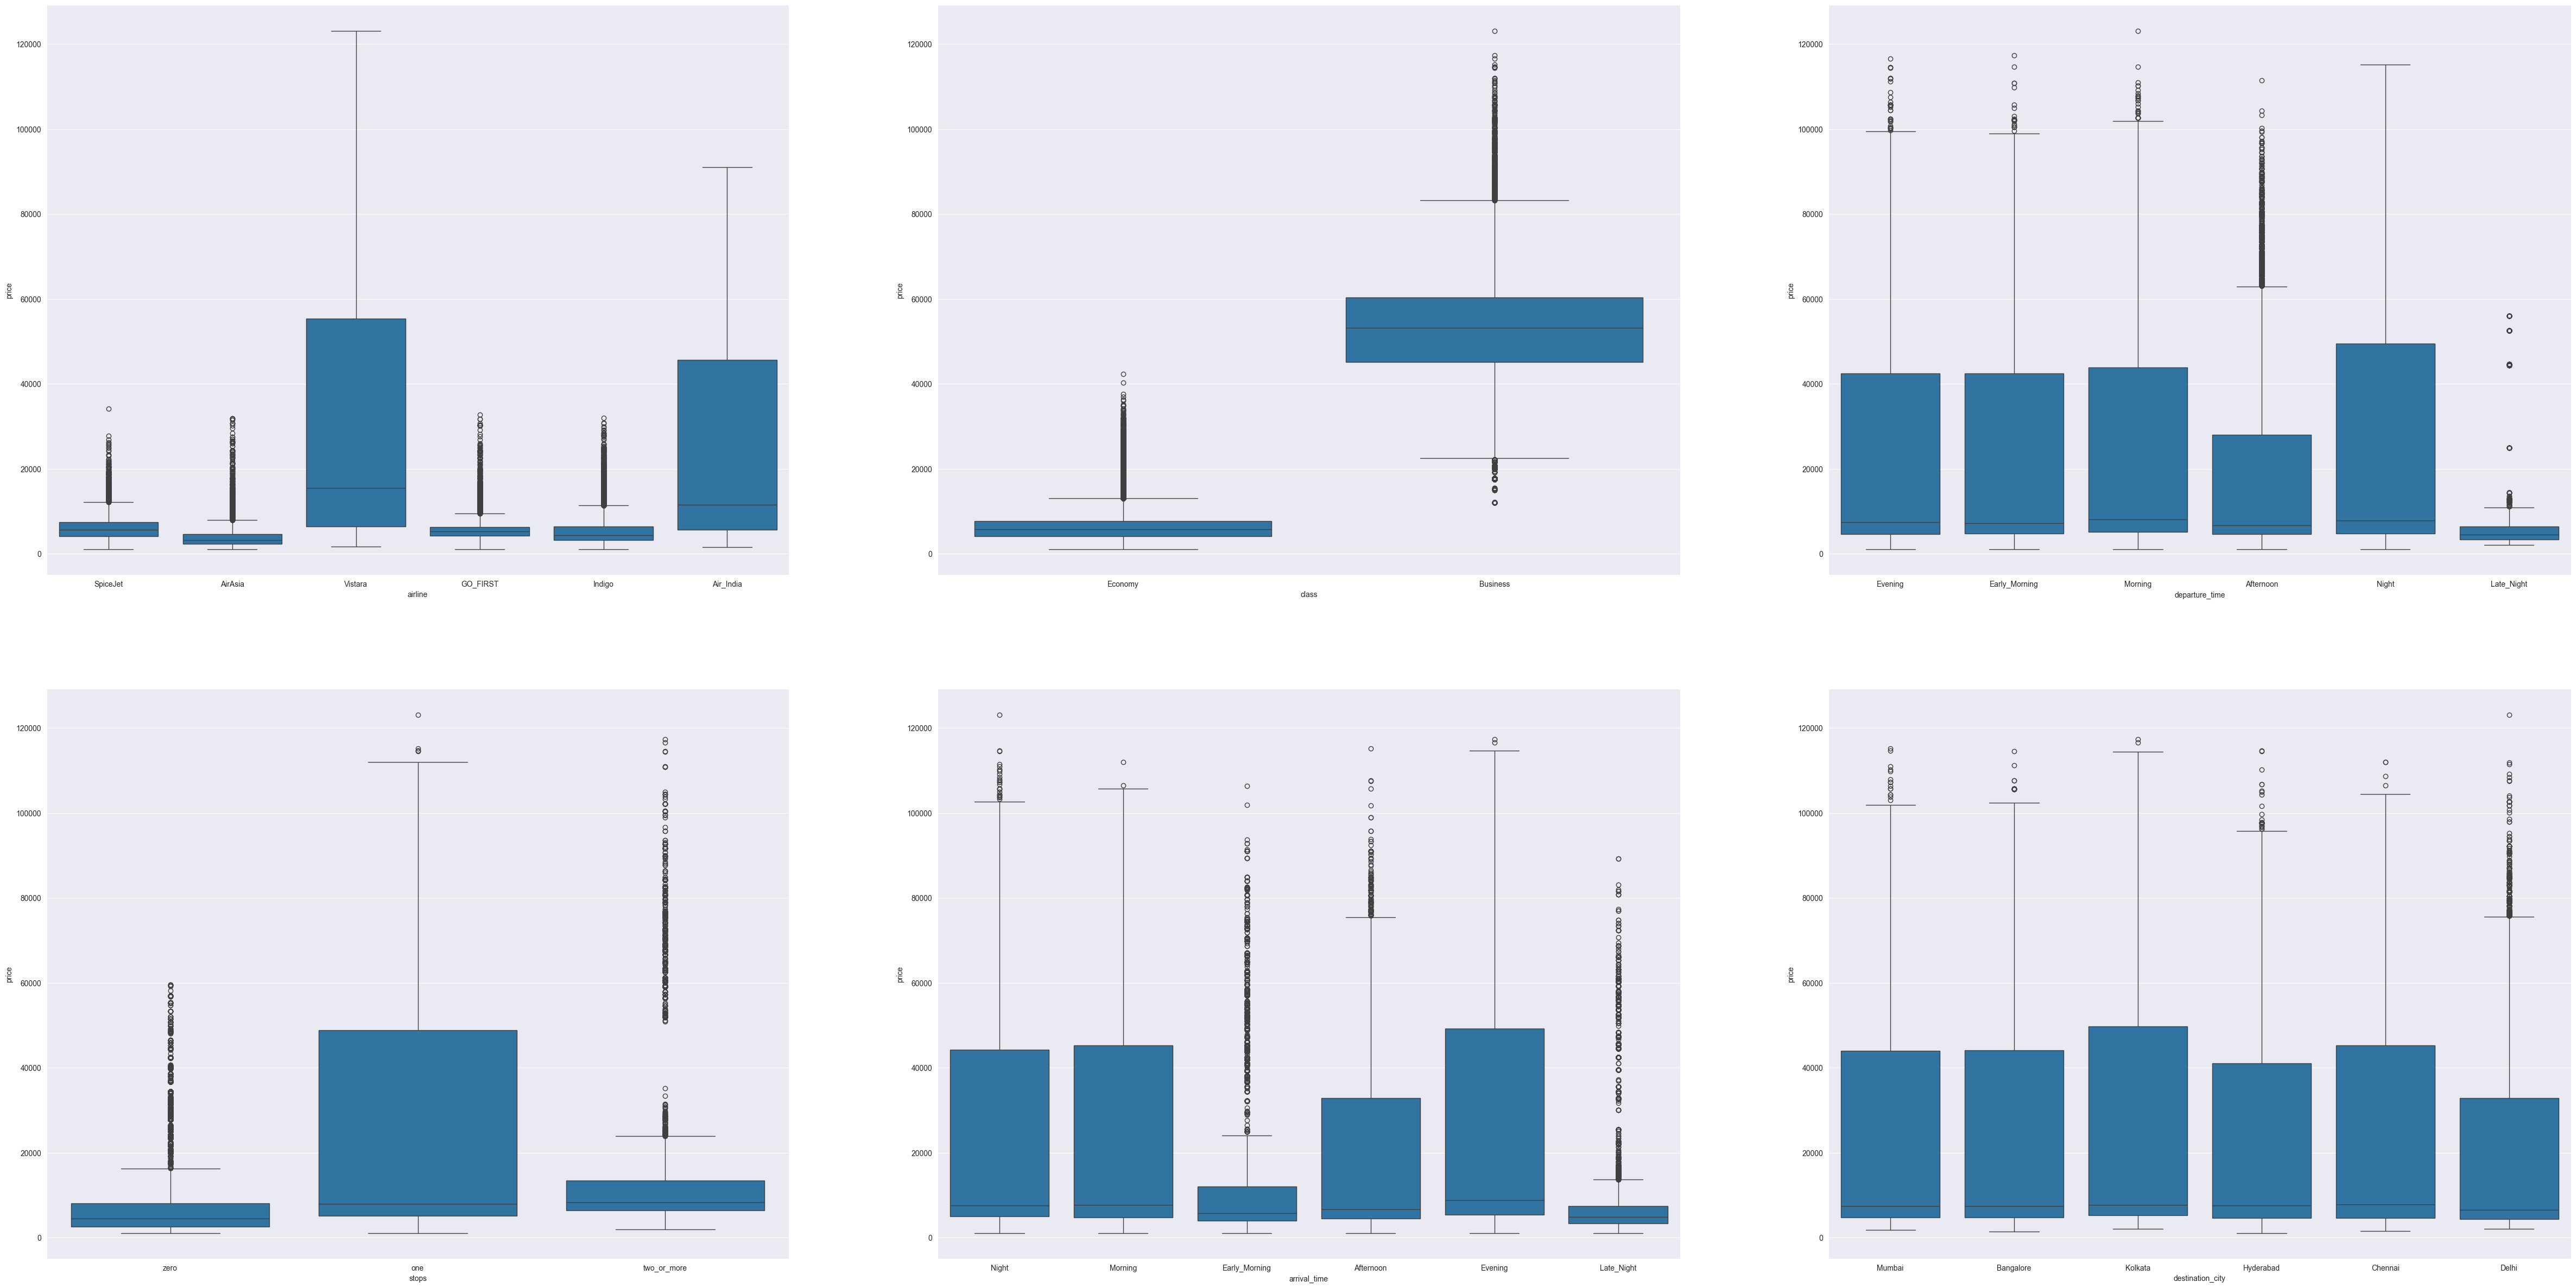

In [199]:
plt.figure(figsize=(60, 30))
plt.subplot(2,3,1)
sns.boxplot(x = "airline", y = "price", data = data)
plt.subplot(2,3,2)
sns.boxplot(x = "class", y = "price", data = data)
plt.subplot(2,3,3)
sns.boxplot(x = "departure_time", y = "price", data = data)
plt.subplot(2,3,4)
sns.boxplot(x = "stops", y = "price", data = data)
plt.subplot(2,3,5)
sns.boxplot(x = "arrival_time", y = "price", data= data )
plt.subplot(2,3,6)
sns.boxplot(x = "destination_city", y = "price", data = data)
# plt.subplot(2,3,1)
# sns.boxplot(x = "source_city", y = "price", data = data)
plt.show()

### Análises das variáveis categóricas:

Box plots das variáveis categóricas antes da converção para dummies, com o preço, variável a ser prevista.

# Montando Regressão linear

Para analisar os mínimos quadrados e a regressão linear, utilizamos dois métodos diferentes, um a partir da função pronta da biblioteca scikit-learn do python e o outro a partir da multiplicação de matrizes com numpy, a partir disso podemos comparar os resultados encontrados.

## Método usando função da biblioteca scikit-learn 

In [174]:
x=data_dummies.drop("price",axis=1)
y=data_dummies["price"]

In [175]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=25,train_size=0.80)

In [176]:
reg=LinearRegression()
model=reg.fit(x_train,y_train)

In [177]:
model.score(x_test,y_test)

0.9107968015609899

In [178]:
print("Linear regression r2 score com sklearn: ", model.score(x_test,y_test) )

Linear regression r2 score com sklearn:  0.9107968015609899


## Método usando numpy e multiplicação de matrizes

In [179]:
x_train

,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
154862,5,22,0,0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
253148,8,7,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
270966,18,17,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
143014,2,7,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
54524,13,12,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130365,6,20,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
92303,2,41,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
6618,2,34,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
90430,8,33,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [180]:
y_train

154862     5823
253148    60508
270966    52175
143014     6489
54524      5102
          ...  
130365     6067
92303      4500
6618       2410
90430      2723
29828      5955
Name: price, Length: 240122, dtype: int32

In [181]:
def linear_regression_PI(x, y):
    x = np.hstack((np.ones((x.shape[0], 1)), x))
    x = x.astype(int)
    w = (np.linalg.inv(x.T @ x) @ x.T) @ y

    return w

def predict(x, w):
     x = np.hstack((np.ones((x.shape[0], 1)), x))

     return x @ w

In [182]:
X_train, X_test, y_train, y_test = \
    train_test_split(x, y, random_state=42, train_size=0.8, shuffle=True)
print ("train size={}, test_size={}, total_size={}".format(
    X_train.shape[0], X_test.shape[0], df.shape[0])
)

train size=240122, test_size=60031, total_size=300153


In [183]:
w = linear_regression_PI(X_train, y_train)

In [184]:
w

array([ 5.25860345e+04,  4.41833539e+01, -1.30428330e+02,  1.06038358e+02,
        1.69161571e+03,  2.12553616e+03,  2.29749023e+03,  4.06234678e+03,
       -7.65788138e+01, -1.41394462e+03, -1.67640353e+03,  1.59466050e+03,
       -2.08146336e+02,  8.09730428e+02,  7.34017394e+02,  1.54165771e+03,
        8.66675082e+02,  6.58833604e+02,  2.10268751e+03, -7.60065444e+03,
       -7.71387646e+02,  9.22609282e+02,  9.67994613e+02,  4.60058333e+02,
        1.13539841e+03, -2.40545388e+02, -1.56387798e+03, -1.71422596e+03,
        1.35612185e+03, -3.26828897e+01, -4.49295609e+04])

In [185]:
y_pred_PI = predict(X_test, w)
y_pred_PI

array([ 3422.32709263, 55132.09268333, 10409.82632715, ...,
        4953.62756649, -1611.06622628, 57515.45531987])

In [186]:
print("Linear regression r2 score com numpy: ", r2_score(y_test, y_pred_PI))

Linear regression r2 score com numpy:  0.9113125698039832


## Dados escalonados


### Predição com sklearn, com os dados na mesma escala

### Predição com numpy, com os dados na mesma escala